<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/Trabalho2_DOGS_Image_Processing_CONVOLUCAO_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Impotando bibliotecas para execução no código
from matplotlib import pyplot as plt #Biblioteca para gráficos
from sklearn import preprocessing #Usada para pre-tratamento e normalização de valores
from sklearn.model_selection import train_test_split #Usada para particionar os dados em treino e teste
from sklearn.metrics import classification_report #Para exibir métricas da classificação
import numpy as np #Cálculos e números
import pandas as pd #Apresentanção de informação no formato tipo uma tabela
import cv2 #Tratamento de imagem
import random #Usada para gerar número aleatório
import zipfile  #Usada para descompactar o material
from keras.models import Sequential #Convolução
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization #Biblioteca para uso da convolução


In [2]:
#Baixando as fotos
!gdown --id 1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO

Downloading...
From: https://drive.google.com/uc?id=1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO
To: /content/ann_dogs.zip
6.82MB [00:00, 60.1MB/s]


In [3]:
#Descompatando as fotos e extraindo
import zipfile
file_name = zipfile.ZipFile('ann_dogs.zip', 'r')
file_name.extractall()

In [4]:
# Carrengado as fotos e tratamento de tamanho e cor
FILE='ann_dogs.zip'
Img_Size = 100
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_gray.append(cv2.resize(cv2.imread(name, 3),(Img_Size,Img_Size)))

In [5]:
# coloca as tres primeiras letras e colocou na lista de todas as imagens
y_names = [] 
for yy in img_name:
  name = yy[9]+yy[10]+yy[11]
  y_names.append(name)

In [6]:
#criacao das listas da ann
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)
unique_list 

['BAS', 'BUL', 'LAB', 'POO']

In [7]:
n = len(unique_list)
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

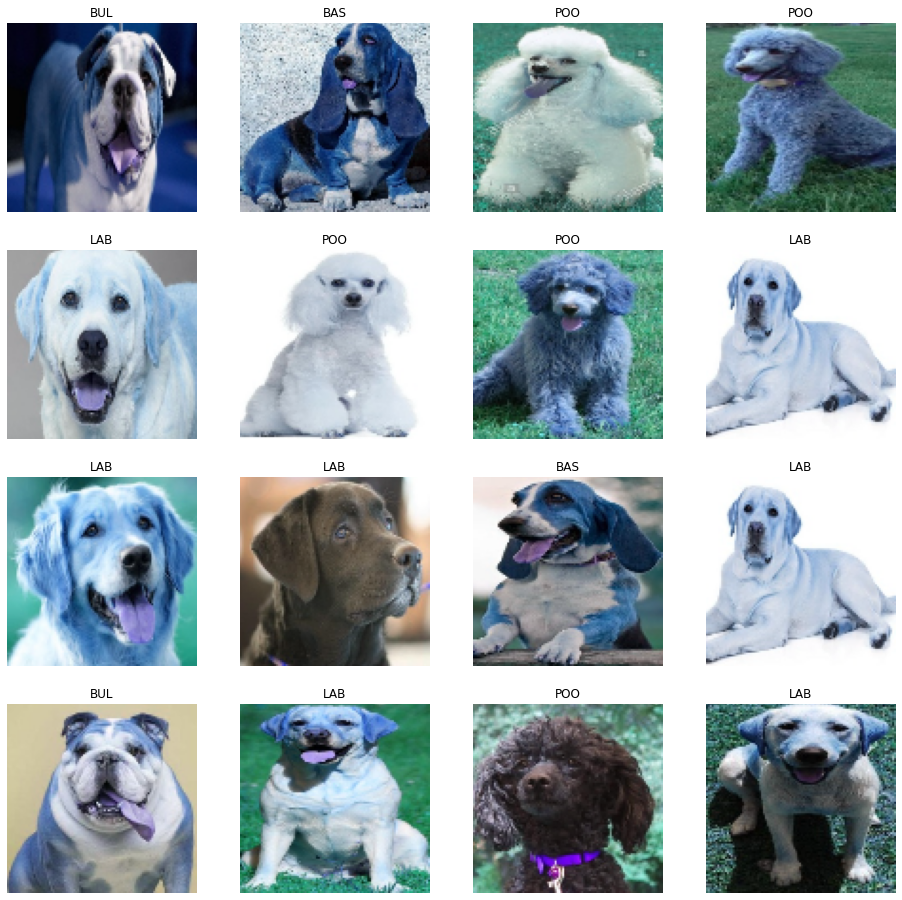

In [8]:
#mostra fotos aleatorias da biblioteca
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(16): 
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [9]:
 #transforma as fotos/matrizes em linhas 
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel())

X = pd.DataFrame(x_data)

In [10]:
#separando os dataset em test e train
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) 

In [11]:
# helper
def ynindicator(y):
  N = len(y)
  K = len(set(y))
  I = np.zeros((N, K))
  I[np.arange(N), y] = 1
  return I
#Tratamento e "normalização dos valores"
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# sequenciamento das fotos
model = Sequential()

#Convulução dos dados
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(10, 10)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=120))
model.add(Activation('relu'))
model.add(Dropout(0.30))
model.add(Dense(units=K))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
# Apresenta métricas resultados da classficação
r = model.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
8/8 [==============================] - 18s 55ms/step - loss: 7.8026 - accuracy: 0.2721
Epoch 2/40
8/8 [==============================] - 0s 18ms/step - loss: 2.1384 - accuracy: 0.3329
Epoch 3/40
8/8 [==============================] - 0s 17ms/step - loss: 1.4140 - accuracy: 0.3645
Epoch 4/40
8/8 [==============================] - 0s 18ms/step - loss: 1.2216 - accuracy: 0.4467
Epoch 5/40
8/8 [==============================] - 0s 18ms/step - loss: 1.1080 - accuracy: 0.4651
Epoch 6/40
8/8 [==============================] - 0s 17ms/step - loss: 1.0317 - accuracy: 0.5556
Epoch 7/40
8/8 [==============================] - 0s 17ms/step - loss: 0.9782 - accuracy: 0.5828
Epoch 8/40
8/8 [==============================] - 0s 17ms/step - loss: 0.9787 - accuracy: 0.5330
Epoch 9/40
8/8 [==============================] - 0s 18ms/step - loss: 0.9268 - accuracy: 0.6074
Epoch 10/40
8/8 [==============================] - 0s 17ms/step - loss: 0.8417 - accuracy: 0.6055
Epoch 11/40
8/8 [===========

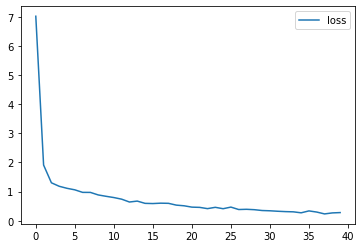

In [13]:
# Plota a tendência de loss
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()


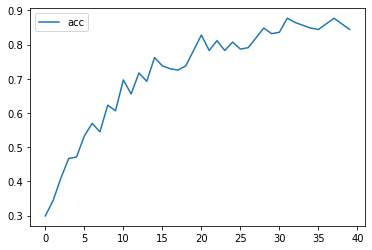

In [14]:
# Plota a tendência da acurácia
plt.plot(r.history['accuracy'], label='acc')
plt.legend()
plt.show()

In [15]:
#Avalia a qualidade do modelo de classficação para a parte do Teste
ynew = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
N_test = len(ynew)

In [17]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")

In [18]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
y_true = y_class.copy()

In [19]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [20]:
#Métricas da qualidade da classificação para o Teste
target_names = ['Basset', 'Bulldog', 'Labrador', 'Poodle']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Basset       0.84      0.91      0.87        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.69      0.87      0.77        23
      Poodle       0.71      0.45      0.56        11

    accuracy                           0.74        62
   macro avg       0.56      0.56      0.55        62
weighted avg       0.69      0.74      0.71        62

